In [17]:
import pandas as pd
import numpy as np
# utm
# pip install utm
import utm
import re
from glob import glob
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
pd.set_option('mode.chained_assignment', None)

In [18]:
data = pd.read_csv('data_voitures/voitures-commune-energie.csv', delimiter=',')
data = data.drop(columns='Unnamed: 0')
data['Departement']=data['codgeo'].map(lambda x: x[0:2])

data['Annee']=0
for i in range(len(data)):
    data['Annee'].iloc[i]=re.split("-",data['date_arrete'].iloc[i])

data['Annee']=data['Annee'].map(lambda x: x[0])

Liste_annees=list(set(data['Annee']))

data_recompil = pd.DataFrame()

for y in Liste_annees:
    data_y = data[data['Annee']==y]
    data_vehicules_y = data_y.groupby('Departement').sum()
    data_vehicules_y['Annee']=y
    data_vehicules_y['Proportion_Elec_par_Departement']=(data_vehicules_y['nb_vp_rechargeables_el']/data_vehicules_y['nb_vp'])*100
    data_ = pd.concat([data_recompil,data_vehicules_y], axis=0)
    data_recompil=data_

data_recompil

In [ ]:
df = data_recompil.groupby('Annee').mean()

df['Evolution_parc']=0
df['Evolution_stockEV']=0
df['Evolution_stockGaz']=0

for i in range(1,len(df)):
    df['Evolution_parc'].iloc[i]=df['nb_vp'].iloc[i]/df['nb_vp'].iloc[i-1]
    df['Evolution_stockEV'].iloc[i]=df['nb_vp_rechargeables_el'].iloc[i]/df['nb_vp_rechargeables_el'].iloc[i-1]
    df['Evolution_stockGaz'].iloc[i]=df['nb_vp_rechargeables_gaz'].iloc[i]/df['nb_vp_rechargeables_gaz'].iloc[i-1]

df

,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,Proportion_Elec_par_Departement,Evolution_parc,Evolution_stockEV,Evolution_stockGaz
Annee,,,,,,,
2020,4277.969072,43.422680,6.844719e+05,0.550052,0.000000,0.000000,0.000000
2021,24708.855670,179.453608,2.769743e+06,0.788297,4.046540,5.775838,4.132716
2022,27304.701031,142.123711,2.099739e+06,1.153429,0.758099,1.105057,0.791980


In [ ]:
df_project = df.copy()
df_project

for i in range(19):
    df_project.loc[2022+i]=[0,0,0,0,0,0,0]

for i in range(3, len(df_project)):
    df_project['nb_vp_rechargeables_el'].iloc[i]=df_project['nb_vp_rechargeables_el'].iloc[i-1]+(df_project['nb_vp_rechargeables_el'].iloc[i-1]*0.25)
    df_project['nb_vp_rechargeables_gaz'].iloc[i]=df_project['nb_vp_rechargeables_gaz'].iloc[i-1]+(df_project['nb_vp_rechargeables_gaz'].iloc[i-1]*0.25)
    df_project['nb_vp'].iloc[i]=df_project['nb_vp'].iloc[2]
    df_project['Proportion_Elec_par_Departement'].iloc[i]=(df_project['nb_vp_rechargeables_el'].iloc[i]/df_project['nb_vp'].iloc[i])*100
    df_project['Evolution_parc'].iloc[i]=df_project['nb_vp'].iloc[i]/df_project['nb_vp'].iloc[i-1]
    df_project['Evolution_stockEV'].iloc[i]=df_project['nb_vp_rechargeables_el'].iloc[i]/df_project['nb_vp_rechargeables_el'].iloc[i-1]
    df_project['Evolution_stockGaz'].iloc[i]=df_project['nb_vp_rechargeables_gaz'].iloc[i]/df_project['nb_vp_rechargeables_gaz'].iloc[i-1]


,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,Proportion_Elec_par_Departement,Evolution_parc,Evolution_stockEV,Evolution_stockGaz
Annee,,,,,,,
2020,4277.969072,43.422680,6.844719e+05,0.550052,0.000000,0.000000,0.000000
2021,24708.855670,179.453608,2.769743e+06,0.788297,4.046540,5.775838,4.132716
2022,27304.701031,142.123711,2.099739e+06,1.153429,0.758099,1.105057,0.791980
2022,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2023,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2024,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2025,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2026,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2027,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


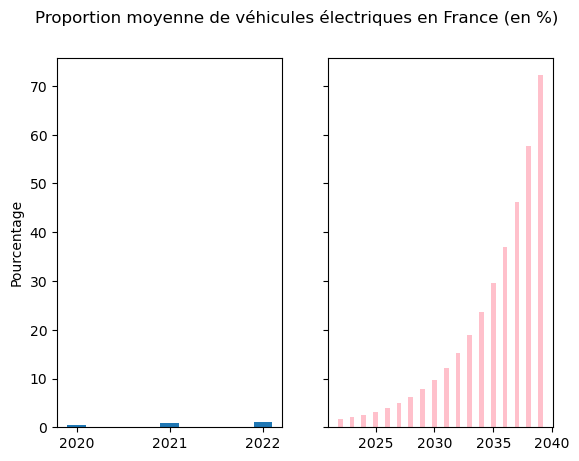

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)

ax1.bar(df.index,df['Proportion_Elec_par_Departement'],width=0.2)
ax1.set_ylabel('Pourcentage')
ax2.bar(df_project.index[3:21],df_project['Proportion_Elec_par_Departement'][3:21], width=0.4, color='pink')

fig.suptitle('Proportion moyenne de véhicules électriques en France (en %)')
plt.show()

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)

ax1.bar(df.index,df['nb_vp_rechargeables_el'],width=0.2)
ax1.set_ylabel('Pourcentage')
ax2.bar(df_project.index[3:21],df_project['nb_vp_rechargeables_el'][3:21], width=0.4, color='pink')

fig.suptitle('Nombre de véhicules électriques en France')
plt.show()